# PHP 2022

## 4. Object-Oriented Programming

### 4.2 Exercise

Implement the below class diagram.

In [1]:
import iplantuml;

Writing output for /home/student/Desktop/PHP_Szymon_Cogiel/php_2022_szymon_cogiel/04_object_oriented/02_exercise/3fa76694-51a6-461c-8de5-e2e60deb3d17.uml to 3fa76694-51a6-461c-8de5-e2e60deb3d17.svg


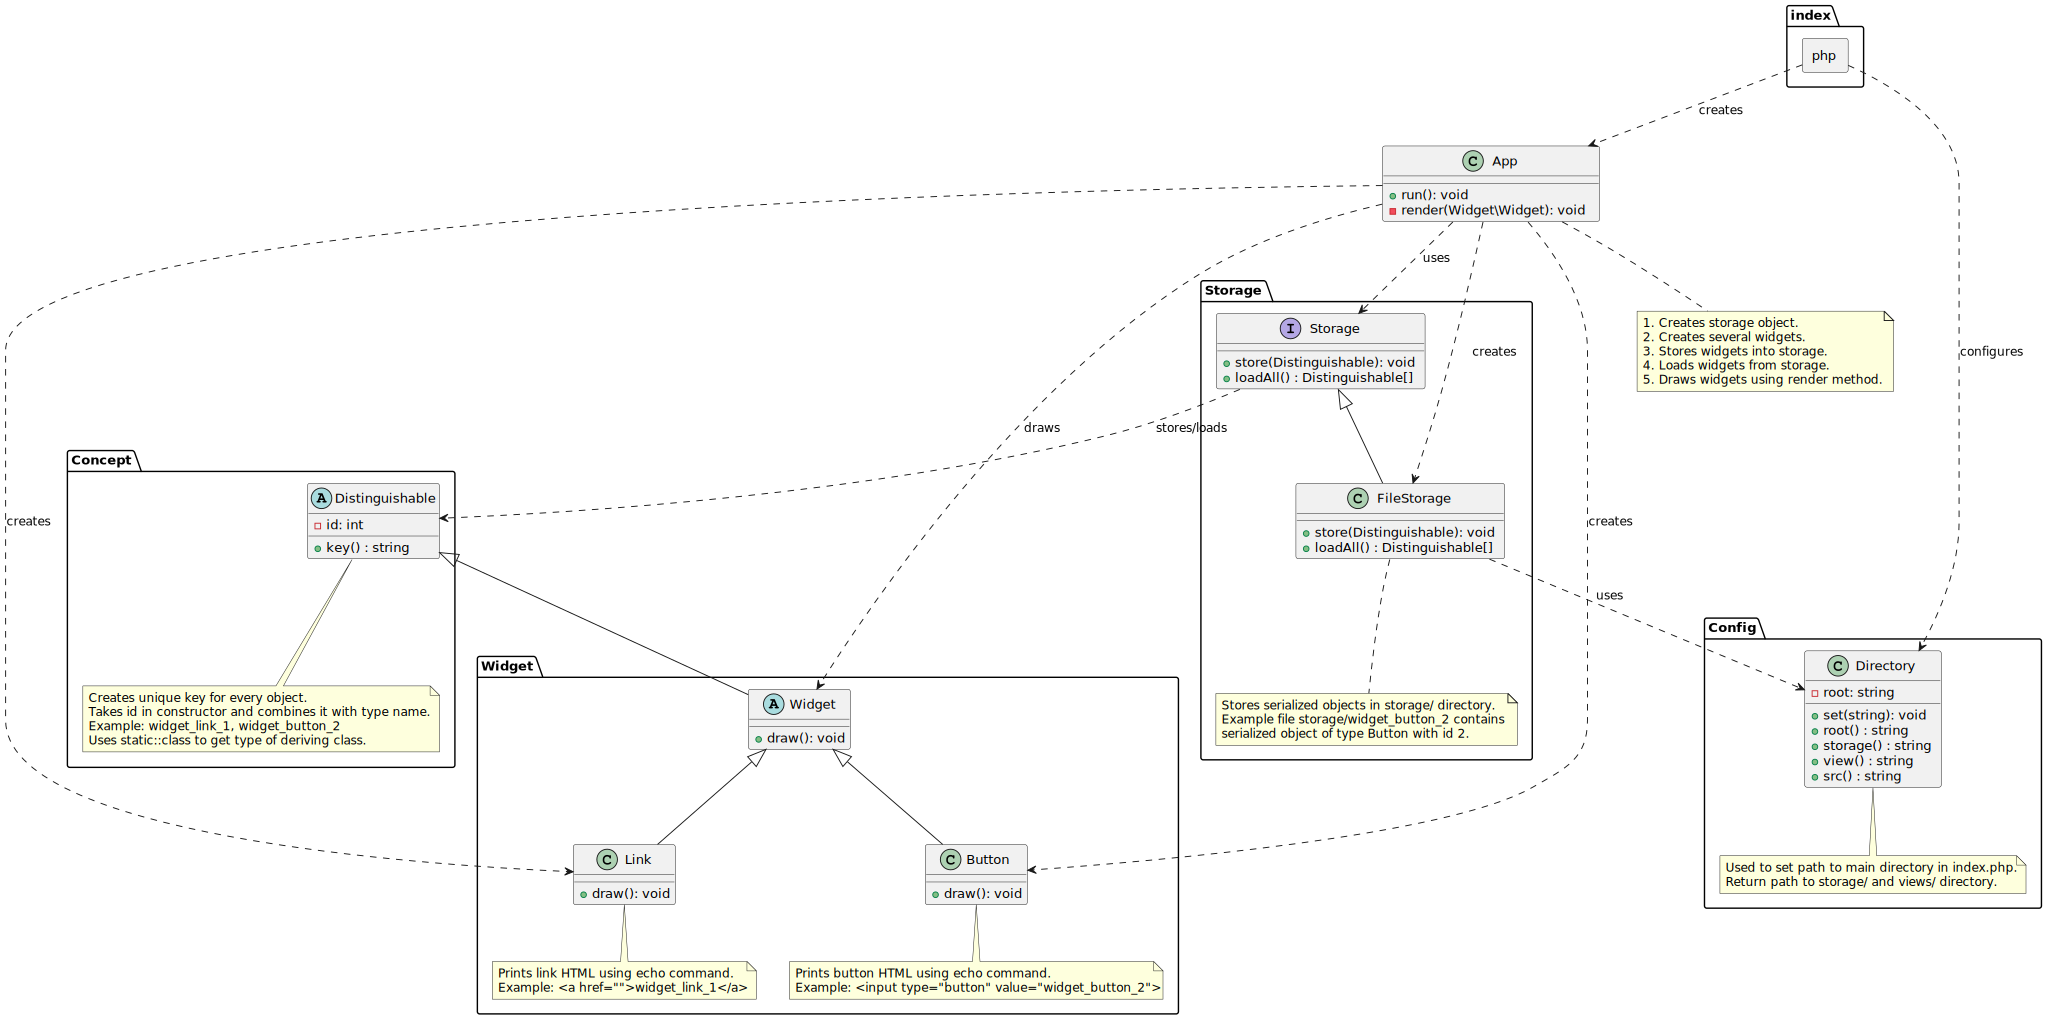

In [2]:
%%plantuml

@startuml

class App {
    + run(): void
    - render(Widget\Widget): void
}

note as AppNote
1. Creates storage object.
2. Creates several widgets.
3. Stores widgets into storage.
4. Loads widgets from storage.
5. Draws widgets using render method.
end note

App .. AppNote

namespace Widget {

    abstract class Widget {
        + draw(): void
    }

    class Link {
        + draw(): void
    }

    note as LinkNote
    Prints link HTML using echo command.
    Example: <a href="">widget_link_1</a>
    end note

    Link .. LinkNote

    class Button {
        + draw(): void
    }

    note as ButtonNote
    Prints button HTML using echo command.
    Example: <input type="button" value="widget_button_2">
    end note

    Button .. ButtonNote

    Widget <|-- Link
    Widget <|-- Button
}

App ..> Widget.Widget : draws
App ..> Widget.Button : creates
App ..> Widget.Link : creates

namespace Concept {

    abstract class Distinguishable {
        - id: int
        + key() : string
    }

    note as DistinguishableNote
    Creates unique key for every object.
    Takes id in constructor and combines it with type name.
    Example: widget_link_1, widget_button_2
    Uses static::class to get type of deriving class.
    end note

    Distinguishable .. DistinguishableNote
}

Concept.Distinguishable <|-- Widget.Widget

namespace Config {

    class Directory {
        - {static} root: string
        + {static} set(string): void
        + {static} root() : string
        + {static} storage() : string
        + {static} view() : string
        + {static} src() : string
    }

    note as DirectoryNote
    Used to set path to main directory in index.php.
    Return path to storage/ and views/ directory.
    end note

    Directory .. DirectoryNote
}

namespace Storage {

    interface Storage {
        + store(Distinguishable): void
        + loadAll() : Distinguishable[]
    }

    class FileStorage {
        + store(Distinguishable): void
        + loadAll() : Distinguishable[]
    }

    note as FileStorageNote
    Stores serialized objects in storage/ directory.
    Example file storage/widget_button_2 contains
    serialized object of type Button with id 2.
    end note

    FileStorage .. FileStorageNote

    Storage <|-- FileStorage
}

Storage.Storage ..> Concept.Distinguishable : stores/loads
Storage.FileStorage ..> Config.Directory : uses

App ..> Storage.FileStorage : creates
App ..> Storage.Storage : uses

package index.php <<Rectangle>> {
}

index.php ..> App : creates
index.php ..> Config.Directory : configures

@enduml

In [ ]:
! phpstorm project

Info  | RdCoroutineScope          | 42:JobScheduler FJ pool 3/3 | RdCoroutineHost overridden 
2023-03-23 19:09:31,632 [  14875]   WARN - #c.i.o.a.i.ActionUpdater - 1288 ms to grab EDT for BackAction#update@MainToolbar (com.intellij.ide.actions.BackAction)
2023-03-23 19:09:32,047 [  15290]   WARN - #c.i.o.v.ExternallyAddedFilesProcessorImpl - Cannot find project config directory for non-default and non-directory based project project
2023-03-23 19:09:34,863 [  18106]   WARN - #c.i.o.v.ExternallyAddedFilesProcessorImpl - Cannot find project config directory for non-default and non-directory based project project
2023-03-23 19:38:38,243 [1761486]   WARN - #c.i.u.x.Binding - no accessors for org.jetbrains.idea.perforce.perforce.ConnectionId
2023-03-23 19:40:54,090 [1897333]   WARN - #c.i.o.a.e.ActionUtil - Can not find action by id CompileDirty


You can test your solution using included tests:

In [ ]:
! composer global require phpstan/phpstan

In [ ]:
! ~/.composer/vendor/bin/phpstan analyze --level max project

In [ ]:
import subprocess
phpServer = subprocess.Popen(['php', '-S', 'localhost:8888', '-t', 'project/public'])

In [ ]:
! cd tests && composer install && vendor/bin/codecept run

In [ ]:
phpServer.kill()